<a href="https://colab.research.google.com/github/ayushman1309/ai_project/blob/main/Logistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install pandas

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/IPL_Matches_2008_2022.csv')
df.head()
df.tail()


,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri
949,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,Runs,140.0,NaN,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",Asad Rauf,RE Koertzen


In [13]:
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns)
print("\nInfo:\n")
df.info()
print("\nMissing values:\n", df.isnull().sum())


Shape of dataset: (950, 20)

Columns:
 Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperO

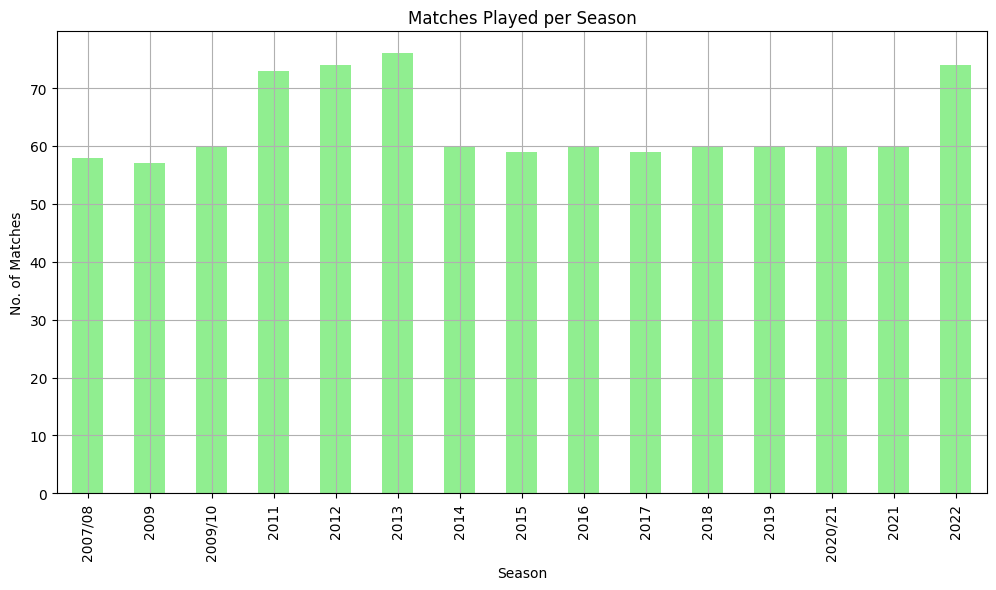

In [14]:
plt.figure(figsize=(12,6))
df['Season'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Matches Played per Season')
plt.xlabel('Season')
plt.ylabel('No. of Matches')
plt.grid(True)
plt.show()


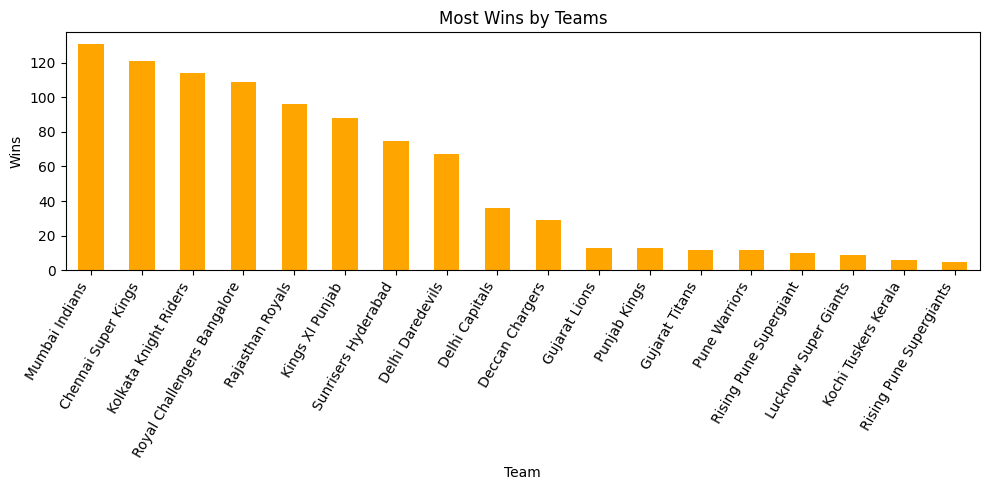

In [29]:
team_wins = df['WinningTeam'].value_counts()

plt.figure(figsize=(10, 5))
team_wins.plot(kind='bar', color='orange')
plt.title('Most Wins by Teams')
plt.xlabel('Team')
plt.ylabel('Wins')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()


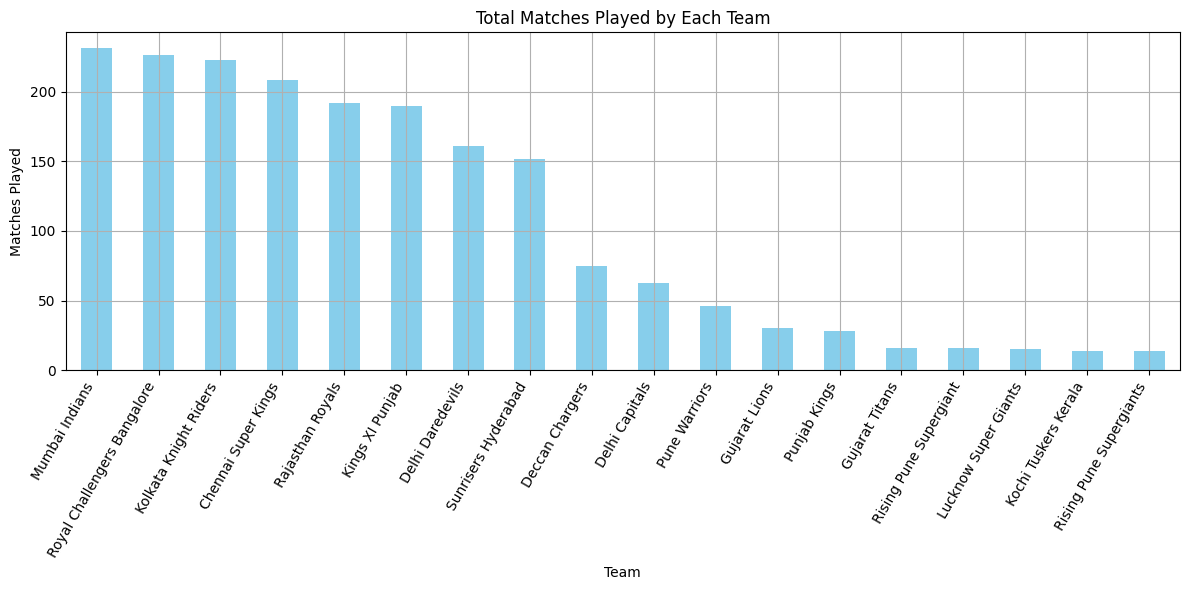

In [30]:
team1_counts = df['Team1'].value_counts()
team2_counts = df['Team2'].value_counts()

# Combine both counts to get total matches played
total_matches = team1_counts.add(team2_counts, fill_value=0).astype(int)
total_matches = total_matches.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
total_matches.plot(kind='bar', color='skyblue')
plt.title('Total Matches Played by Each Team')
plt.xlabel('Team')
plt.ylabel('Matches Played')
plt.xticks(rotation=60, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

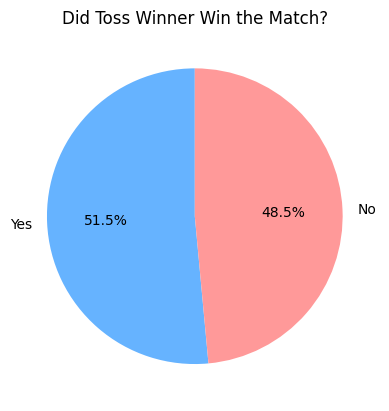

In [31]:
# Toss vs Match Wins
df['TossWin_MatchWin'] = np.where(df['TossWinner'] == df['WinningTeam'], 'Yes', 'No')
toss_match = df['TossWin_MatchWin'].value_counts()

plt.pie(toss_match, labels=toss_match.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Did Toss Winner Win the Match?')
plt.show()


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

# Drop NaNs and create a copy
ml_df = df.dropna(subset=['TossWinner', 'WinningTeam']).copy()

# Target: 1 if TossWinner == WinningTeam
ml_df['Target'] = (ml_df['TossWinner'] == ml_df['WinningTeam']).astype(int)

# Features: One-hot encode TossWinner
X = pd.get_dummies(ml_df['TossWinner'])
y = ml_df['Target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Accuracy Score: 0.5684210526315789
